<a href="https://colab.research.google.com/github/fix27/Colab-Store/blob/main/Virtual_Makeup_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip3 install --user ankdown
#!pip install git+https://github.com/adrn/makecite
#!pip install packerlicious
!git clone https://github.com/badarsh2/Virtual-Makeup.git
%cd ./Virtual-Makeup/eyeshadow
#!python main.py --domain http://google.com --output sitemap.xml
#%cd ..

Cloning into 'Virtual-Makeup'...
remote: Enumerating objects: 52, done.
remote: Total 52 (delta 0), reused 0 (delta 0), pack-reused 52
Unpacking objects: 100% (52/52), done.
/content/Virtual-Makeup/eyeshadow/Virtual-Makeup/eyeshadow


[433, 430, 431, 432, 433, 434, 427, 428, 429, 430, 431, 432, 433, 434, 435, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,

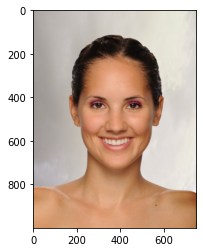

In [ ]:
!pip install numpy
from PIL import Image
import numpy as np,math
import scipy as sp
from scipy.interpolate import interp1d
from pylab import *
from skimage import io, color
import cv2

#Source colour
R,G,B = (102.,0.,51.)

inten = 0.8

lower_left_end = 5
upper_left_end = 11
lower_right_end = 16
upper_right_end = 22





def inter(lx=[],ly=[],k1='quadratic'):
	unew = np.arange(lx[0], lx[-1]+1, 1)
	f2 = interp1d(lx, ly, kind=k1)
	return (f2,unew)

def inter_plot(lx=[],ly=[],k1='quadratic'):
    unew = np.arange(lx[0], lx[-1]+1, 1)
    f2 = interp1d(lx, ly, kind=k1)
    return unew,f2(unew)

def ext(a,b,i):
	x.extend(arange(a,b,1).tolist())
	if(b-a==1):
		y.extend((ones(b-a)*i).tolist())
	else:
		y.extend((ones(b-a+1)*i).tolist())

def extleft(a,b,i):
	xleft.extend(arange(a,b,1).tolist())
	if(b-a==1):
		yleft.extend((ones(b-a)*i).tolist())
	else:
		yleft.extend((ones(b-a+1)*i).tolist())

def extright(a,b,i):
	xright.extend(arange(a,b,1).tolist())
	if(b-a==1):
		yright.extend((ones(b-a)*i).tolist())
	else:
		yright.extend((ones(b-a+1)*i).tolist())
    
   
file = np.loadtxt('pointeyeshadow.txt')
points =  np.floor(file)
point_down_x = np.array((points[:lower_left_end][:,0]))
point_down_y = np.array(points[:lower_left_end][:,1])
point_up_x = np.array(points[lower_left_end:upper_left_end][:,0])
point_up_y = np.array(points[lower_left_end:upper_left_end][:,1])
point_down_x_right = np.array((points[upper_left_end:lower_right_end][:,0]))
point_down_y_right = np.array(points[upper_left_end:lower_right_end][:,1])
point_up_x_right = np.array((points[lower_right_end:upper_right_end][:,0]))
point_up_y_right = np.array(points[lower_right_end:upper_right_end][:,1])

im = imread('out1.jpg')

# imshow(im)
# plot((point_down_x[:],point_down_y[:],'cubic')[0], (point_down_x[:],point_down_y[:],'cubic')[1], 'ro')
# plot((point_up_x[:],point_up_y[:],'cubic')[0], (point_up_x[:],point_up_y[:],'cubic')[1], 'ro')
# plot((point_down_x_right[:],point_down_y_right[:],'cubic')[0], (point_down_x_right[:],point_down_y_right[:],'cubic')[1], 'ro')
# plot((point_up_x_right[:],point_up_y_right[:],'cubic')[0], (point_up_x_right[:],point_up_y_right[:],'cubic')[1], 'ro')

point_down_y_max = max(point_down_y)
point_up_y_min = min(point_up_y)
offset_left = point_down_y_max - point_up_y_min
point_up_y[0] += offset_left*0.625
point_up_y[1] += offset_left*0.3
point_up_y[2] += offset_left*0.15
point_up_y[3] += offset_left*0.1
point_up_y[4] += offset_left*0.2
point_down_y[0] += offset_left*0.625

point_down_y_right_max = max(point_down_y_right)
point_up_y_right_min = min(point_up_y_right)
offset_right = point_down_y_right_max - point_up_y_right_min
point_up_y_right[-1] += offset_right*0.625
point_up_y_right[1] += offset_right*0.2
point_up_y_right[2] += offset_right*0.1
point_up_y_right[3] += offset_right*0.15
point_up_y_right[4] += offset_right*0.3
point_down_y_right[-1] += offset_right*0.625

# plot((point_up_x[:],point_up_y[:],'cubic')[0], (point_up_x[:],point_up_y[:],'cubic')[1], 'go')
# plot((point_up_x_right[:],point_up_y_right[:],'cubic')[0], (point_up_x_right[:],point_up_y_right[:],'cubic')[1], 'go')
# gca().set_aspect('equal', adjustable='box')
# show()


figure()
im = imread('Input.jpg')
im2 = imread('Input.jpg')
height,width = im.shape[:2]

l_l = inter(point_down_x[:],point_down_y[:],'cubic')
u_l = inter(point_up_x[:],point_up_y[:],'cubic')
l_r = inter(point_down_x_right[:],point_down_y_right[:],'cubic')
u_r = inter(point_up_x_right[:],point_up_y_right[:],'cubic')

L,A,bB = 0,0,0


x = []
y = []
xleft=[]
yleft=[]
xright=[]
yright=[]

for i in range(int(l_l[1][0]),int(l_l[1][-1]+1)):
	ext(int(u_l[0](i)),int(l_l[0](i)+1),i)
	extleft(int(u_l[0](i)),int(l_l[0](i)+1),i)

for i in range(int(l_r[1][0]),int(l_r[1][-1]+1)):
	ext(int(u_r[0](i)),int(l_r[0](i)+1),i)
	extright(int(u_r[0](i)),int(l_r[0](i)+1),i)
#x = map(int,x)
y = list(map(int,y))
y = resize(y,len(x))
#zz = 
#zz =  map(int,zz)
print(x)
print(y)
val = color.rgb2lab((im[x,y]/255.).reshape(len(x),1,3)).reshape(len(x),3)
L = mean(val[:,0])
A = mean(val[:,1])
bB = mean(val[:,2])

rgbmean = (im[x,y])
rmean = mean(rgbmean[:,0])
gmean = mean(rgbmean[:,1])
bmean = mean(rgbmean[:,2])
# print rmean, gmean, bmean

L,A,bB = color.rgb2lab(np.array((rmean/255.,gmean/255.,bmean/255.)).reshape(1,1,3)).reshape(3,)
L1,A1,B1 = color.rgb2lab(np.array((R/255.,G/255.,B/255.)).reshape(1,1,3)).reshape(3,)
val[:,0] += (L1-L)*inten
val[:,1] += (A1-A)*inten
val[:,2] += (B1-bB)*inten

image_blank1 = imread('Input.jpg')
image_blank = np.copy(image_blank1)
image_blank *= 0
image_blank[x,y] = color.lab2rgb(val.reshape(len(x),1,3)).reshape(len(x),3)*255

original = color.rgb2lab((im[x,y]*0/255.).reshape(len(x),1,3)).reshape(len(x),3)

tobeadded = color.rgb2lab((image_blank[x,y]/255.).reshape(len(x),1,3)).reshape(len(x),3)
original += tobeadded
imold = im
im = np.copy(imold)
im[x,y] = color.lab2rgb(original.reshape(len(x),1,3)).reshape(len(x),3)*255

# Blur Filter
filter = np.zeros((height,width))


#y = list(map(int,y))
yleft = resize(yleft,len(xleft))
yright = resize(yright,len(xright))
cv2.fillConvexPoly(filter,np.array(c_[yleft, xleft],dtype = 'int32'),1)
cv2.fillConvexPoly(filter,np.array(c_[yright, xright],dtype = 'int32'),1)
plt.imshow(filter)
filter = cv2.GaussianBlur(filter,(31,31),0)

# Erosion to reduce blur size
kernel = np.ones((12,12),np.uint8)
filter = cv2.erode(filter,kernel,iterations = 1)

alpha=np.zeros([height,width,3],dtype='float64')
alpha[:,:,0]=filter
alpha[:,:,1]=filter
alpha[:,:,2]=filter


imshow((alpha*im+(1-alpha)*im2).astype('uint8'))
# plot((point_down_x[:],point_down_y[:],'cubic')[0], (point_down_x[:],point_down_y[:],'cubic')[1], 'ro')
# plot((point_down_x[:],point_down_y[:],'cubic')[0], (point_down_x[:],point_down_y[:],'cubic')[1], 'r-')
# plot((point_up_x[:],point_up_y[:],'cubic')[0], (point_up_x[:],point_up_y[:],'cubic')[1], 'ro')
# plot((point_up_x[:],point_up_y[:],'cubic')[0], (point_up_x[:],point_up_y[:],'cubic')[1], 'r-')
# plot((point_down_x_right[:],point_down_y_right[:],'cubic')[0], (point_down_x_right[:],point_down_y_right[:],'cubic')[1], 'ro')
# plot((point_down_x_right[:],point_down_y_right[:],'cubic')[0], (point_down_x_right[:],point_down_y_right[:],'cubic')[1], 'r-')
# plot((point_up_x_right[:],point_up_y_right[:],'cubic')[0], (point_up_x_right[:],point_up_y_right[:],'cubic')[1], 'ro')
# plot((point_up_x_right[:],point_up_y_right[:],'cubic')[0], (point_up_x_right[:],point_up_y_right[:],'cubic')[1], 'r-')
gca().set_aspect('equal', adjustable='box')
imsave('out1.jpg',(alpha*im+(1-alpha)*im2).astype('uint8'))
show()